In [15]:
import numpy as np
import pandas as pd
import os
import cv2
from glob import glob

import matplotlib.pyplot as plt

from tensorflow.keras.layers import BatchNormalization,Conv2D,Dense,Dropout,MaxPool2D,Flatten,AveragePooling2D,GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [16]:
# defining the image size for modelling
IMAGE_SIZE=[256,256]

In [24]:
# path to the train and test directory
train_path = (r'C:\Users\booba\.keras\datasets\Amazon_Image')
test_path = (r'C:\Users\booba\.keras\datasets\Amazon_Image')

In [25]:
# getting all the images path from train, test directories respectively ..

train_files = glob(train_path + "/*/*.jpg")
test_files = glob(test_path + "/*/*.jpg")

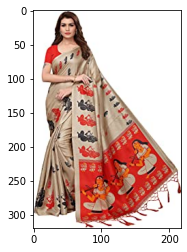

In [26]:
plt.imshow(image.load_img(np.random.choice(train_files)))

# Data Augmentations and Data Splitting

In [27]:
# create an instance of the imagedatagenerator

gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.2,
    vertical_flip=True)

In [29]:
# train and test data generator

train_gen = gen.flow_from_directory(r'C:\Users\booba\.keras\datasets\Amazon_Image',target_size=IMAGE_SIZE,shuffle=True)
test_gen = gen.flow_from_directory(r'C:\Users\booba\.keras\datasets\Amazon_Image',target_size=IMAGE_SIZE,shuffle=True)

Found 202 images belonging to 3 classes.
Found 202 images belonging to 3 classes.


In [30]:
# the following directory gives the class indices

train_gen.class_indices

{'Jeans': 0, 'Sarees': 1, 'Trousers': 2}

# Model Building

In [32]:
# Importing the VGG 16 Model and its preprocessed Inputs

from tensorflow.keras.applications import VGG16 as Pretrained_Model
from tensorflow.keras.applications.vgg16 import preprocess_input

In [33]:
# setting weights

ptm = Pretrained_Model(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top =False)

58892288/58889256 [==============================] - 8s 0us/step


In [35]:
# map the data into feature vectors
# keras image data generators return one hot codded classes

x = Flatten()(ptm.output)
prediction = Dense(3,activation='softmax')(x)

In [36]:
# create a new model instance

model = tf.keras.models.Model(inputs=ptm.input,outputs=prediction)

In [37]:
# get the summary of the model

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [38]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [39]:
# fitting the model

Early_Stopping = tf.keras.callbacks.EarlyStopping(verbose=3,patience=3)
model.fit(train_gen,epochs=12,
          validation_data=test_gen)

Epoch 1/12
7/7 [==============================] - 479s 68s/step - loss: 4.4171 - accuracy: 0.3762 - val_loss: 1.1481 - val_accuracy: 0.3317
Epoch 2/12
7/7 [==============================] - 413s 60s/step - loss: 1.1958 - accuracy: 0.3267 - val_loss: 1.1319 - val_accuracy: 0.3020
Epoch 3/12
7/7 [==============================] - 403s 64s/step - loss: 1.1436 - accuracy: 0.3069 - val_loss: 1.1060 - val_accuracy: 0.4010
Epoch 4/12
7/7 [==============================] - 415s 61s/step - loss: 1.1046 - accuracy: 0.3713 - val_loss: 1.4126 - val_accuracy: 0.3317
Epoch 5/12
7/7 [==============================] - 410s 60s/step - loss: 1.1668 - accuracy: 0.3812 - val_loss: 1.0671 - val_accuracy: 0.4109
Epoch 6/12
7/7 [==============================] - 410s 60s/step - loss: 1.0722 - accuracy: 0.3416 - val_loss: 1.0367 - val_accuracy: 0.3614
Epoch 7/12
7/7 [==============================] - 409s 60s/step - loss: 0.9217 - accuracy: 0.5743 - val_loss: 0.9522 - val_accuracy: 0.4059
Epoch 8/12
7/7 [====

In [40]:
# create a dataframe to show the metrics per epoch

losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,4.417110,0.376238,1.148076,0.331683
1,1.195787,0.326733,1.131946,0.301980
2,1.143606,0.306931,1.106008,0.400990
3,1.104565,0.371287,1.412576,0.331683
4,1.166801,0.381188,1.067067,0.410891
5,1.072215,0.341584,1.036735,0.361386
6,0.921745,0.574257,0.952249,0.405941
7,0.710130,0.623762,0.891175,0.638614
8,0.848407,0.608911,0.549648,0.673267
9,0.669920,0.668317,0.550001,0.658416


No handles with labels found to put in legend.


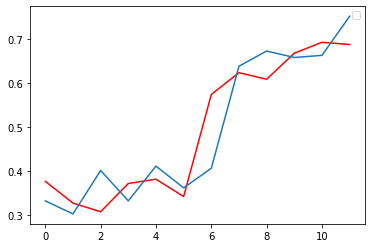

In [41]:
# plotting the accuracy of the model

plt.plot(losses['accuracy'],color='red')
plt.plot(losses['val_accuracy'])
plt.legend()

No handles with labels found to put in legend.


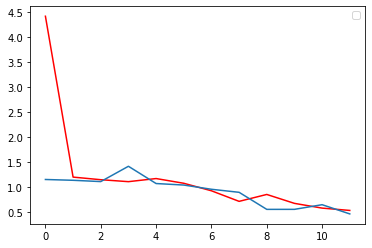

In [42]:
plt.plot(losses['loss'],color='red')
plt.plot(losses['val_loss'])
plt.legend()

# Predicting on any random image

In [43]:
name_labels_df = pd.DataFrame(list(test_gen.class_indices.items()),columns = ['names','labels'],index=None)

In [44]:
name_labels_df

,names,labels
0,Jeans,0
1,Sarees,1
2,Trousers,2


In [52]:
#predicting any random image
import numpy as np
from keras.preprocessing import image

def predict_random_image():
  img = image.load_img(np.random.choice(test_files), target_size=IMAGE_SIZE)
  x = image.img_to_array(img)
  plt.imshow(img)
  x = np.expand_dims(x, axis=0) /255.0
  result_df = pd.DataFrame(list(model.predict(x)[0]),index=name_labels_df.names.values,columns=['result'])
  print(result_df.result.idxmax())

Sarees


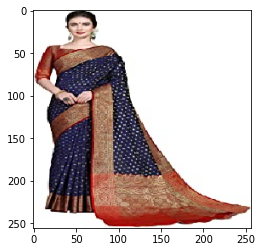

In [53]:
predict_random_image()

Sarees


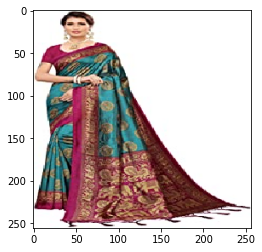

In [54]:
predict_random_image()

Sarees


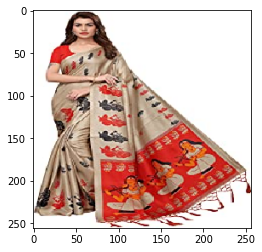

In [55]:
predict_random_image()

# Saving the model

In [56]:
# model artifact

model.save("image_classifier_model.h5")